# Unzipping the Files

In [1]:
!unzip /content/drive/MyDrive/intern-assignment-20210728T071939Z-001.zip

Archive:  /content/drive/MyDrive/intern-assignment-20210728T071939Z-001.zip
  inflating: intern-assignment/36930.png  
  inflating: intern-assignment/74482.xml  
  inflating: intern-assignment/71062.xml  
  inflating: intern-assignment/75940.xml  
  inflating: intern-assignment/51638.xml  
  inflating: intern-assignment/36930.xml  
  inflating: intern-assignment/74482.png  
  inflating: intern-assignment/75940.jpg  
  inflating: intern-assignment/71062.png  
  inflating: intern-assignment/51638.png  


# Import Required Libraries

In [2]:
import xml.etree.cElementTree as etree
import pandas as pd
import cv2
from google.colab.patches import cv2_imshow

# Defining the Necessary Function

In [3]:
def extract_info(xml_path,tags):
    temp = []
    for _, el in etree.iterparse(xml_path):
        if el.text and not el: # leaf element with text
            if el.tag in tags:
                temp.append(el.text)
    return temp

In [4]:
def chunks(lst, n):
    """Yield successive n-sized chunks from lst."""
    for i in range(0, len(lst), n):
        yield lst[i:i + n]

In [5]:
def preprocess_data(xml_path):
    tags = ['name','xmin','ymin','xmax','ymax']
    path = xml_path
    temp = extract_info(path,tags)
    values = list(chunks(temp, 5))
    df = pd.DataFrame(data=values, columns = tags)
    return df

In [6]:
def min_max_values(df,start_point_shift=1, end_point_shift=1):
    xmin = []
    ymin = []
    xmax = []
    ymax = []
    text = []
    for i in range(len(df)):
        xmin.append(int(float(df['xmin'][i]))+start_point_shift)    
        ymin.append(int(float(df['ymin'][i]))+start_point_shift)    
        xmax.append(int(float(df['xmax'][i]))+end_point_shift)    
        ymax.append(int(float(df['ymax'][i]))+end_point_shift) 
        text.append(df['name'][i]) 
    return xmin , ymin , xmax , ymax , text

In [7]:
def plot_image(xml_path,img_path,font=cv2.FONT_HERSHEY_COMPLEX,fontscale=0.5,start_point_shift=1, end_point_shift=1):
    df = preprocess_data(xml_path)
    xmin, ymin, xmax,ymax ,text = min_max_values(df,start_point_shift, end_point_shift)
    img = cv2.imread(img_path)
    for i in range(len(df)):
        start_point = (xmin[i], ymin[i])
        end_point = (xmax[i],ymax[i])
        image = cv2.rectangle(img, start_point,end_point, (0,255,0), 1)

        #text
        text_on_image = text[i]
        origin = (xmin[i], ymin[i]-10)
        # font = cv2.FONT_HERSHEY_COMPLEX

        image_text = cv2.putText(image, text_on_image, origin, font, fontscale, (0,255,0))
        cv2.imwrite(img_path.split('/')[-1],image)
    return cv2_imshow(image)

# OUTPUTS

## 1. Image

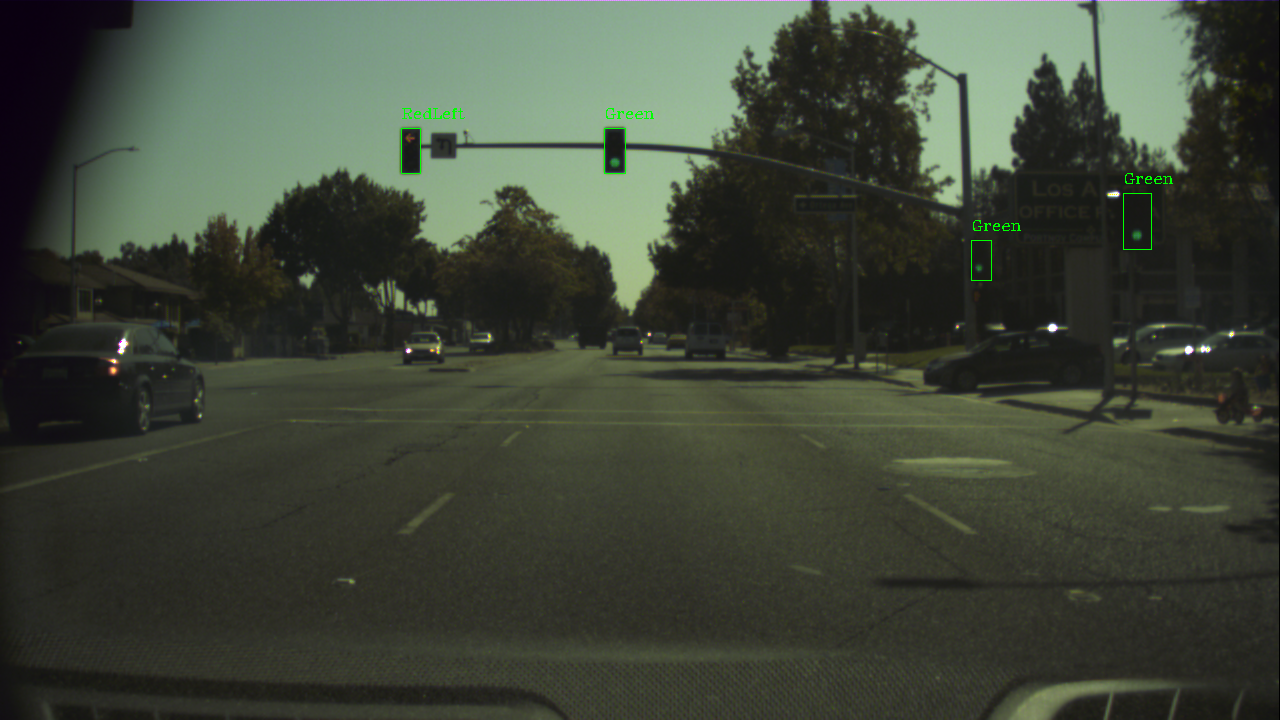

In [8]:
xml_path = "/content/intern-assignment/36930.xml"
img_path = "/content/intern-assignment/36930.png"

plot_image(xml_path,img_path)

## 2. Image

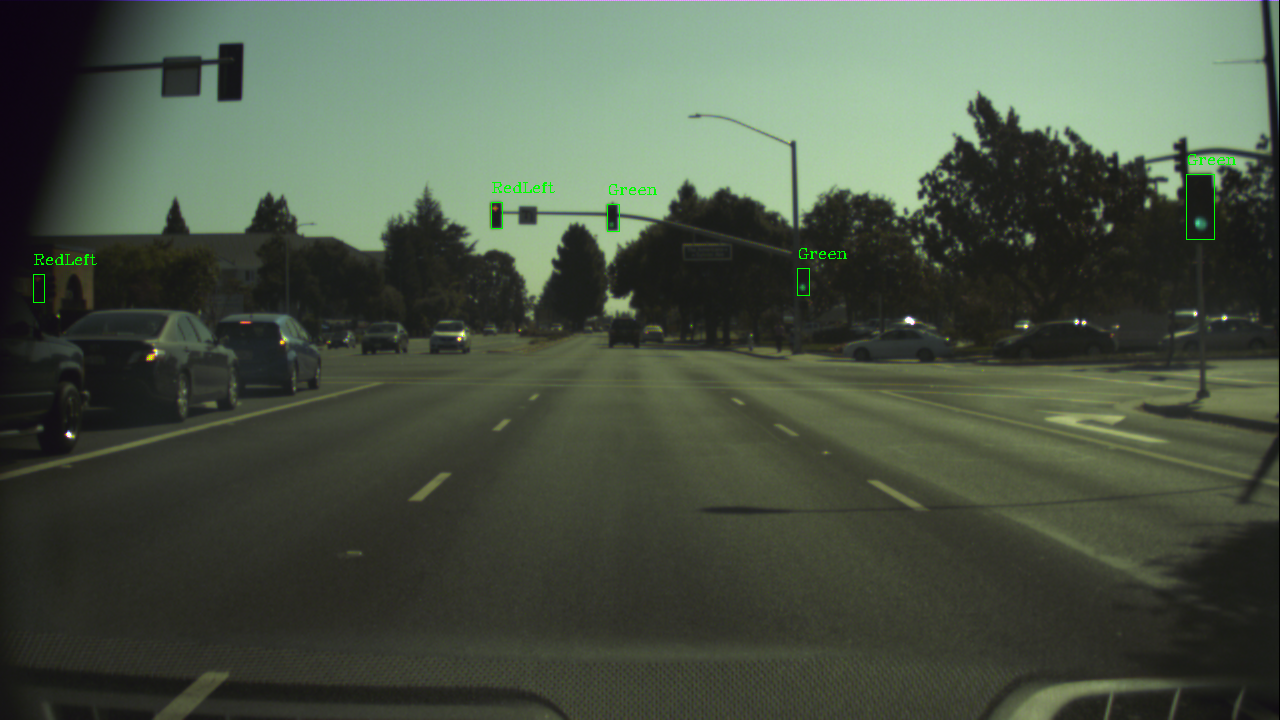

In [9]:
xml_path = "/content/intern-assignment/51638.xml"
img_path = "/content/intern-assignment/51638.png"

plot_image(xml_path,img_path)

## 3. Image

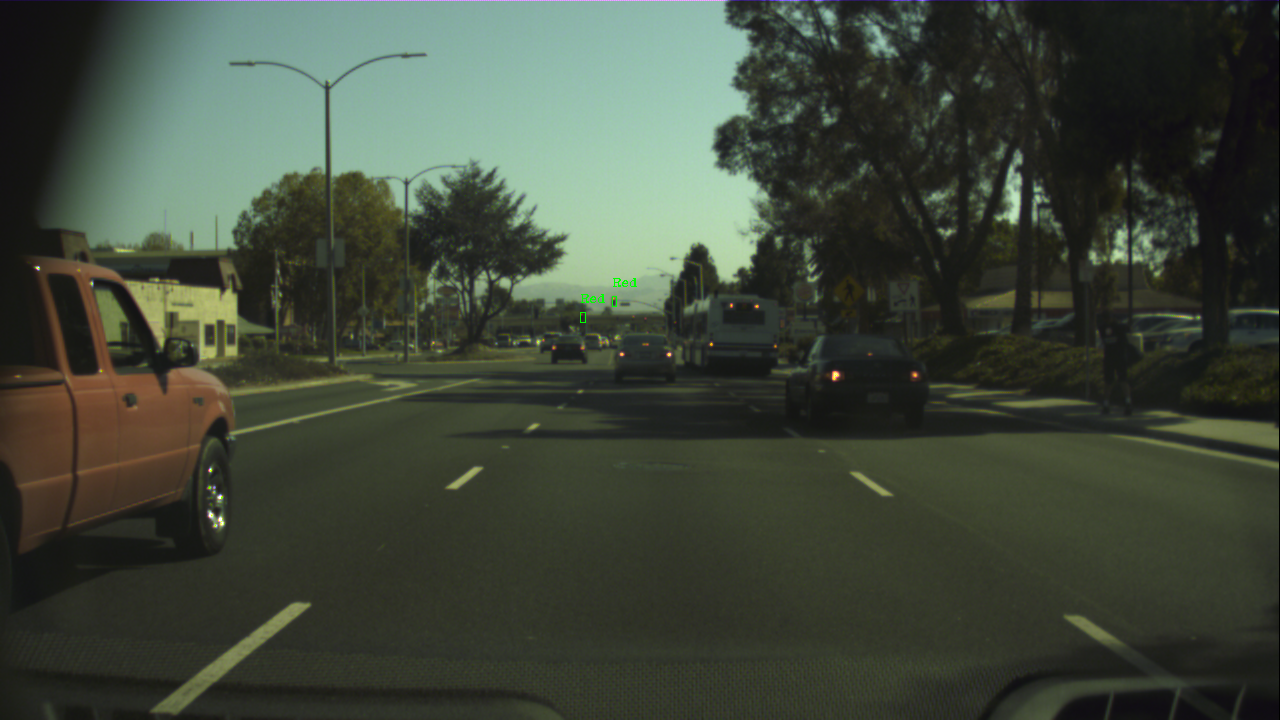

In [10]:
xml_path = "/content/intern-assignment/71062.xml"
img_path = "/content/intern-assignment/71062.png"

plot_image(xml_path,img_path,fontscale=0.4)

## 4. Image

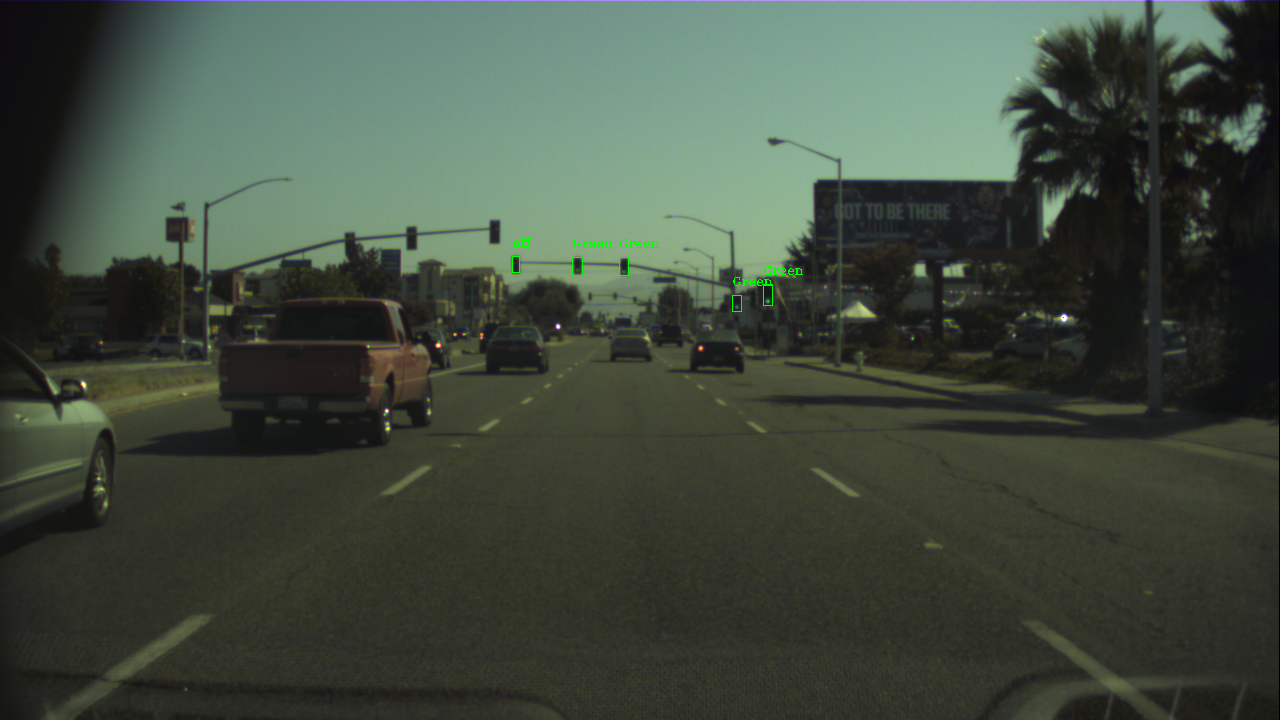

In [11]:
xml_path = "/content/intern-assignment/74482.xml"
img_path = "/content/intern-assignment/74482.png"

plot_image(xml_path,img_path, fontscale=0.4,start_point_shift= -1, end_point_shift=1)

## 5. Image

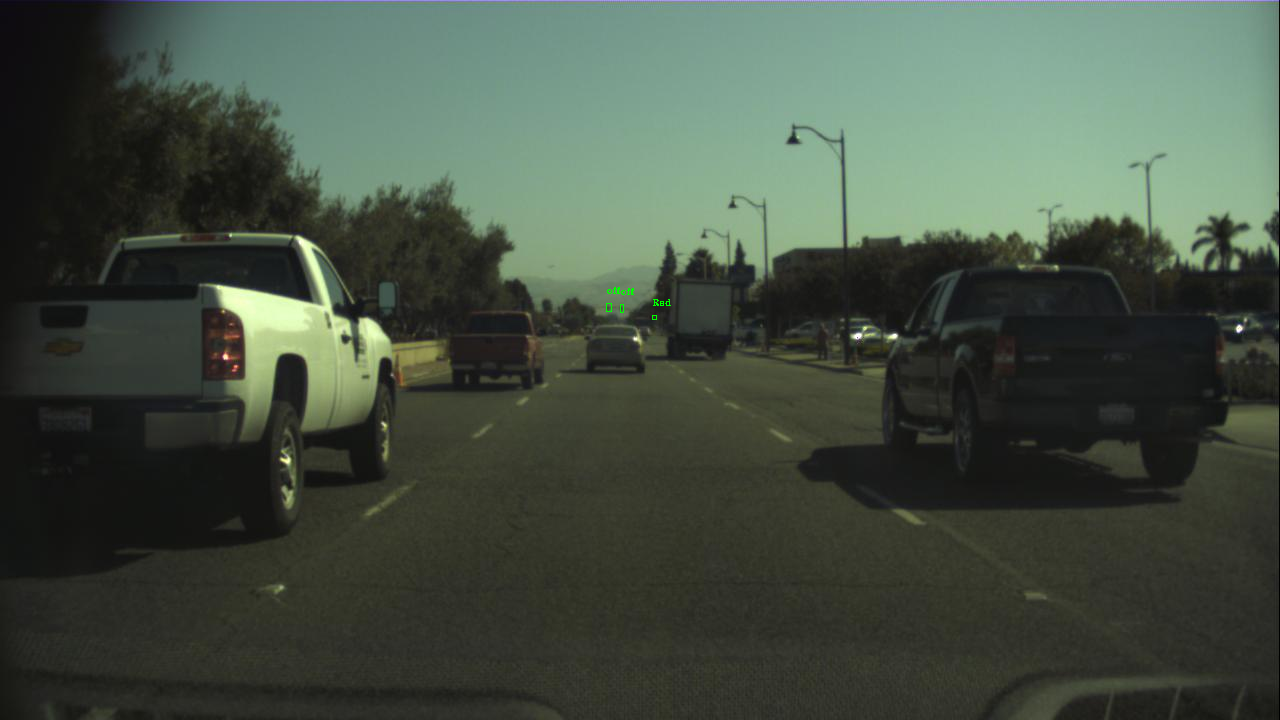

In [12]:
xml_path = "/content/intern-assignment/75940.xml"
img_path = "/content/intern-assignment/75940.jpg"

plot_image(xml_path,img_path,fontscale=0.3)